## Figure 3: Percent of Forbes 400 members with top 30 private and public university BA degrees

### From Elite Embeddedness

By Charlie Eaton and Albina Gibadullina

In [1]:
use data/d_forbes400_alum_board_1989_2003_2017, clear
gen nonfin=(pehedge!=1 & otherfin!=1 & technology!=1)
gen all=1

In [2]:
local pehedge "private equity & hedge"
local otherfin "other finance"
local technology "technology"
local nonfin "other"
quietly foreach var in pehedge otherfin nonfin technology all {
gen top30BAprivate`var'=(collegeschooltype==3)*100 if `var'==1
    label var top30BAprivate`var' "``var''"
gen top30BApublic`var'=(collegeschooltype==2)*100 if `var'==1
    label var top30BApublic`var' "``var''"
}

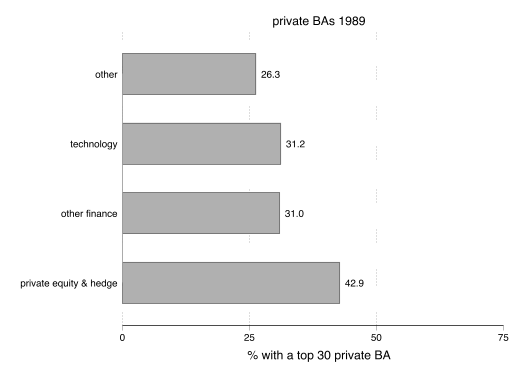

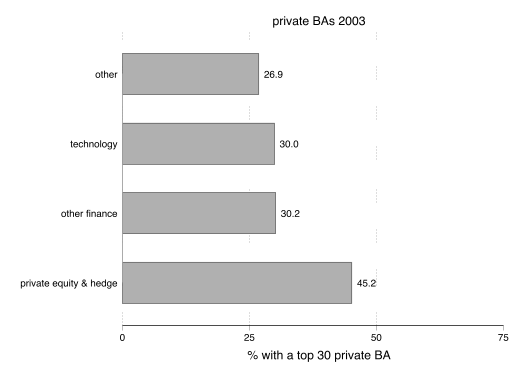

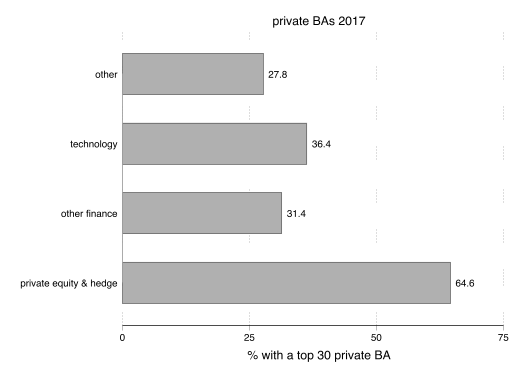

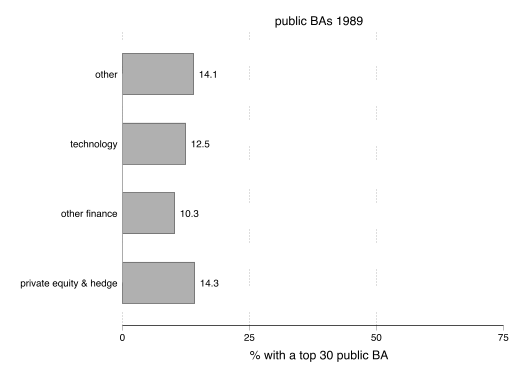

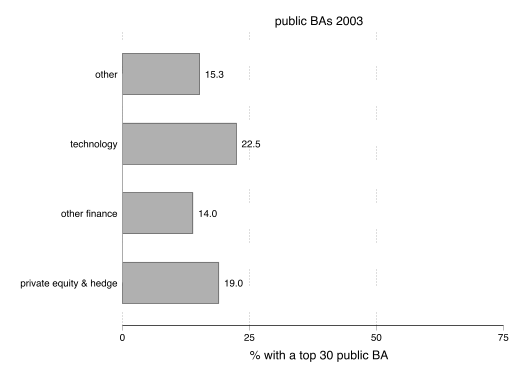

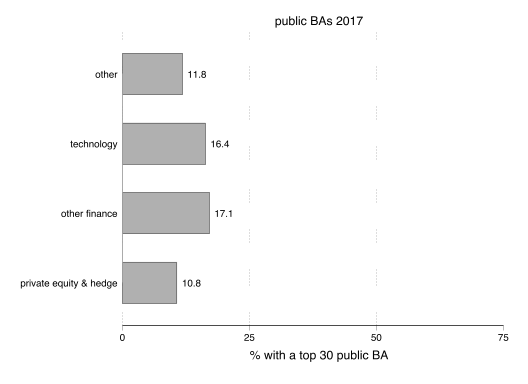

In [3]:
foreach control in private public {
foreach degree in BA {
foreach year in 1989 2003 2017 {
qui statplot top30`degree'`control'nonfin top30`degree'`control'tech ///
top30`degree'`control'otherfin top30`degree'`control'pehedge ///
if year==`year', name(top30`degree'`control'`year', replace) blabel(bar, format(%9.1f)) ///
ytitle("% with a top 30 `control' `degree'") title(`control' BAs `year') ylabel(0(25)75) scheme(plotplain)
}
}
}

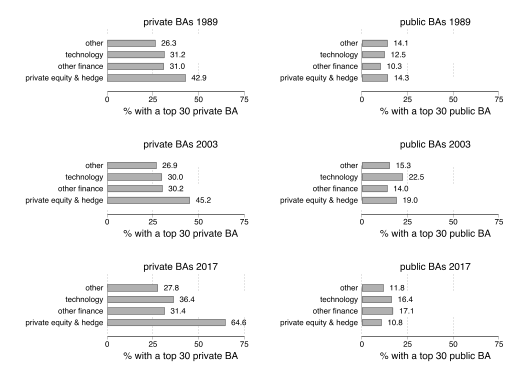

In [4]:
graph combine top30BAprivate1989 top30BApublic1989 top30BAprivate2003 ///
 top30BApublic2003 top30BAprivate2017 top30BApublic2017 ///
,  scheme(plotplain) name(Forbes400privatedegrees, replace) ///
rows(3) xsize(5)

In [5]:
graph export figures/f3_forbes_ba.pdf, replace

file figures/f3_forbes_ba.pdf saved as PDF format
